### 실습 목차

* 1. 텍스트 전처리
  * 1-1. Tokenization
    * 1-1-1. 단어 토큰화
    * 1-1-2. 문장 토큰화
  * 1-2. Cleaning
  * 1-3. Normalization
    * 1-3-1. Stemming
    * 1-3-2. Lemmatization
  * 1-4. Edit Distance
  

## 1. 텍스트 전처리

```
💡 목차 개요 : 텍스트 전처리의 여러 방법들을 파악하고 직접 적용해봅니다
```

- 1-1 Tokenization에 대해 이해하고 자연어를 직접 토큰 단위로 분할해봅니다
- 1-2 불필요한 텍스트를 정제하거나 제외하는 Cleaning 과정을 수행해봅니다
- 1-3 유사한 의미를 갖는 자연언어들을 처리하고 통합하는 과정을 이해합니다
- 1-4 문자열 간의 거리 개념과 edit distance가 갖는 연산을 이해합니다


### 1-1. Tokenization

주어진 데이터를 토큰(Token)이라 불리는 단위로 나누는 작업을 tokenization이라고합니다. 토큰이 되는 기준은 설정하기에 따라 다를 수 있습니다(어절, 단어, 형태소, 음절, 자소 등). 

일반적으로 Character-based Tokenization / Word-based Tokenization / Subword-based Tokenization으로 구분됩니다



In [1]:
import nltk

nltk.download('punkt')

## nltk에서는 여러 tokenizer들을 제공합니다. 
## 해당 라이브러리에 있는 함수들을 사용하면 사전에 정의된 tokenizer의 규칙에 따라 쉽게 자연언어 문장을 토큰화할 수 있습니다
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer

[nltk_data] Downloading package punkt to /home/pervinco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
## 예제 문장
text = "You won't be able to know about natural language perfectly, but you need to master a number of preprocessing skills to perform natural language processing."

#### 1-1-1 단어 토큰화

**word_tokenize**
+ nltk의 word_tokenize는 문장을 단어 기반으로 토큰화합니다. 해당 함수는 ```space와 구두점을 기준으로``` 토큰화합니다
+ 해당 함수는 won't를 wo / n't로 분리하고있는 것을 볼 수 있습니다

In [3]:
# word_toknize
word_tokenize(text)

['You',
 'wo',
 "n't",
 'be',
 'able',
 'to',
 'know',
 'about',
 'natural',
 'language',
 'perfectly',
 ',',
 'but',
 'you',
 'need',
 'to',
 'master',
 'a',
 'number',
 'of',
 'preprocessing',
 'skills',
 'to',
 'perform',
 'natural',
 'language',
 'processing',
 '.']

**WordPunctTokenizer**
+ WordPunctTokenizer는 word_tokenize에 대한 대안으로써 ```구두점을 별도로 분류하는 특징```을 갖고 있기때문에, 앞서 확인했던 word_tokenize와는 달리 won't를 won과 t로 분리합니다

In [4]:
# WordPunctTokenizer
punct_tokenizer = WordPunctTokenizer() # 토크나이저를 선언

punct_tokenizer.tokenize(text)

['You',
 'won',
 "'",
 't',
 'be',
 'able',
 'to',
 'know',
 'about',
 'natural',
 'language',
 'perfectly',
 ',',
 'but',
 'you',
 'need',
 'to',
 'master',
 'a',
 'number',
 'of',
 'preprocessing',
 'skills',
 'to',
 'perform',
 'natural',
 'language',
 'processing',
 '.']

**TreebankWordTokenizer**
+ TreebankWordTokenizer는 가장 표준적인 방법의 토큰화 방법으로 사용되는 tokenizer입니다
+ 해당 토크나이저는 두가지 규칙을 갖습니다
  + 규칙 1. 하이푼(-)으로 구성된 단어는 하나로 유지한다
  + 규칙 2. doesn't와 같이 아포스트로피(')로 '접어'가 함께하는 단어는 분리해준다

In [5]:
tree_tokenizer = TreebankWordTokenizer() # 토크나이저를 선언

tree_tokenizer.tokenize(text)

['You',
 'wo',
 "n't",
 'be',
 'able',
 'to',
 'know',
 'about',
 'natural',
 'language',
 'perfectly',
 ',',
 'but',
 'you',
 'need',
 'to',
 'master',
 'a',
 'number',
 'of',
 'preprocessing',
 'skills',
 'to',
 'perform',
 'natural',
 'language',
 'processing',
 '.']

#### 1-1-2 문장 토큰화

+ ```nltk.sent_tokenize```를 사용하면 마침표에 따라 여러 문장들을 문장 단위로 구분할 수 있습니다
+ sent_tokenize는 단순히 ```마침표의 유무 만으로 문장의 종결여부를 판단하지는 않습니다``` <br>
따라서 단순히 '.' 이 있다고해서 무조건 구분하는 것은 아닙니다

In [6]:
sentences = "NLP stands for Natural Language Processing. \
It is a branch of artificial intelligence (AI) that focuses on the interaction between computers and human language. \
NLP combines techniques from linguistics, computer science, and machine learning to enable computers to understand, interpret, \
and generate human language in a way that is meaningful and useful."

In [7]:
nltk.sent_tokenize(sentences) # 문장단위로 분리

['NLP stands for Natural Language Processing.',
 'It is a branch of artificial intelligence (AI) that focuses on the interaction between computers and human language.',
 'NLP combines techniques from linguistics, computer science, and machine learning to enable computers to understand, interpret, and generate human language in a way that is meaningful and useful.']

In [8]:
## Ph.D는 하나의 단어지만 마침표가 포함되어 있다.
## NLTK는 단순히 마침표의 유무로 판단하지 않으므로 정상적으로 처리 가능
sentences = "I am actively looking for Ph.D. students. and you are a Ph.D student."

In [9]:
nltk.sent_tokenize(sentences) # 문장단위로 분리

['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']

### 1-2. Cleaning

코퍼스 내에서 ```토큰화 작업에 방해가 되거나 의미가 없는 부분의 텍스트, 노이즈를 제거하는 작업입니다.``` 

토큰화 전에 정제를 하기도 하지만, 이후에도 여전히 남아있는 노이즈들을 제거하기 위해 지속적으로 수행합니다. 

이때 노이즈는 특수 문자 같은 아무 의미도 갖지 않는 글자들을 의미하기도 하지만, 분석하고자 하는 목적에 맞지 않는 불필요한 단어들을 말합니다


In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # nltk 내장 stopword 다운로드

stop=set(stopwords.words('english'))
print(stop)

{'i', 'just', 'once', 'because', 'through', 'when', 'now', 'those', "doesn't", 'very', 'her', "that'll", 'd', 'hers', "hasn't", "haven't", 'itself', 'did', 'should', 'if', 'whom', 'he', 'off', "needn't", 've', 'don', 'here', 'she', 'this', "should've", 'these', 'to', 'of', 'why', 'an', 'them', 'by', 'between', 'being', 'out', 'ain', 'ma', 'there', 'under', 'other', 'while', 'm', 'some', 'all', 'we', 'hasn', 'where', 'y', 'isn', 'against', "you'll", 'will', 'theirs', "couldn't", 'yourself', "wouldn't", 'ours', 'my', 'each', 't', 'yours', 'what', 'such', 'didn', 'for', 'after', 'been', 'both', 'wouldn', "don't", 'up', 'again', 'have', 'yourselves', 'is', 'too', "weren't", 'during', 'over', 'then', 'with', 'won', "didn't", 'does', 'having', 'our', 'below', 'no', 'me', 'couldn', 'can', 'which', 'myself', "it's", 'ourselves', 'it', "shouldn't", 'haven', 'hadn', 'themselves', 'll', "isn't", 'into', 'aren', 'in', 'or', 'his', 'who', 'from', 'shan', 'that', 'needn', 'but', 'am', 'than', 'they'

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pervinco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


> ```stopword```는 단어 단위의 불용어를 다루기 때문에 tokenizer에서도 단어단위(word_tokenize)로 맞춰주는 것이 좋다.

In [11]:
sen="I want to go to shopping and a I want to buy some of snack"
tokens=nltk.word_tokenize(sen)

clean_tokens=[]
for tok in tokens:
  ## 토큰의 길이가 1 초과이고, 소문자면서 stopword에 속하지 않는 경우.
  if len(tok.lower())>1 and (tok.lower() not in stop):
    clean_tokens.append(tok) # clean_tokens 리스트에 추가


print("불용어 포함: ",tokens)
print("불용어 미포함: ",clean_tokens)

불용어 포함:  ['I', 'want', 'to', 'go', 'to', 'shopping', 'and', 'a', 'I', 'want', 'to', 'buy', 'some', 'of', 'snack']
불용어 미포함:  ['want', 'go', 'shopping', 'want', 'buy', 'snack']


### 1-3. Normalization

Normalization은 ```의미가 중복되거나 의미론적으로 유사한 단어들을 하나로 통합```하거나, ```단어의 원형을 찾아 통일해주는 작업```을 말합니다. 크게 Stemming과 Lemmatization이 있습니다


#### 1-3-1 Stemming
* stem:(식물의) 줄기라는 뜻을 가진 영어단어로, 언어학에서는 stem을 어간이라고 합니다
* 어간은 굴절하는 단어에서 변화하지 않는 부분을 의미합니다. 즉, stemming이란 어간 추출을 말합니다

* 쉽게 말해 형태가 변한 단어로부터 군더더기를 제거하고 그 단어의 원래 모습을 추출하는 것을 말합니다

* 예를 들어 ```going```이라는 단어가 있다면 Stemming을 진행할시 ```go```가 됩니다. ```Computers```라는 단어를 Stemming을 진행할 시 ```Comput``` 를 추출하는 과정을 Stemming이라고 합니다


In [12]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [13]:
s = PorterStemmer() # stemmer 선언
text = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
words = word_tokenize(text) ## word tokenize
print(words)

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']


토큰화된 단어들에 대해서 stemming을 진행합니다. 이때 stemming은 rule 기반의 알고리즘으로 이루어지기 때문에 등록이 되어있지 않은 단어의 경우이거나 잘못인식되는 경우 부정확할 수 있는 여지가 남아있습니다

In [14]:
for i in words:
  print(f'{i} ==> {s.stem(i)}') # stemming되기 이전단어와 이후 단어를 출력

This ==> thi
was ==> wa
not ==> not
the ==> the
map ==> map
we ==> we
found ==> found
in ==> in
Billy ==> billi
Bones ==> bone
's ==> 's
chest ==> chest
, ==> ,
but ==> but
an ==> an
accurate ==> accur
copy ==> copi
, ==> ,
complete ==> complet
in ==> in
all ==> all
things ==> thing
-- ==> --
names ==> name
and ==> and
heights ==> height
and ==> and
soundings ==> sound
-- ==> --
with ==> with
the ==> the
single ==> singl
exception ==> except
of ==> of
the ==> the
red ==> red
crosses ==> cross
and ==> and
the ==> the
written ==> written
notes ==> note
. ==> .


#### 1-3-2 Lemmatization

* Lemmatization이란 ```문장 속에서 다양한 형태로 활용된(inflected) 단어의 표제어(lemma, 원형)를 찾는 일```을 뜻합니다
* 여기서 말하는 ```표제어```란 ```사전에서 단어의 뜻을 찾을 때 쓰는 기본형```이라고 생각하시면 됩니다
* 즉 Lemmatization은 단어의 원형을 추출해주는 녀석입니다
* 예를들어, ```is```를 Lemmatization하면 ```be```가 되고, ```ate```을 Lemmatization하면 ```eat```이 됩니다

In [15]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/pervinco/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Lemmatization을 위해 WordNetLemmatizer를 로드하고, 여러 단어들을 나열해보겠습니다

In [16]:
lemmatizer = WordNetLemmatizer() # lemmatizer 선언
words = ['doing', 'has', 'going', 'loves', 'lives', 'flying', 'dies', 'watching', 'started', 'seen']

WordNetLemmatizer는 ```입력으로 단어가 동사 품사라는 사실을 알려줄 수 있습니다.``` 

즉, 단어들이 문장에서 ```동사로 쓰였다는 것을 알려준다면``` 표제어 추출기는 ```품사의 정보를 보존하면서 정확한 Lemma를 출력```하게 됩니다

In [17]:
for i in words:
  lemma = lemmatizer.lemmatize(i, pos='v')
  print(f'{i} ==> {lemma}') # lemmatization되기 이전단어와 이후 단어를 출력

doing ==> do
has ==> have
going ==> go
loves ==> love
lives ==> live
flying ==> fly
dies ==> die
watching ==> watch
started ==> start
seen ==> see


### 1-4. Edit Distance

> Edit Distance란 2개의 문자열이 얼만큼 다른가를 거리개념으로 치환해 숫자로 표현한 것이라고 이해할 수 있습니다. Edit Distance에는 삽입, 삭제, 교체로 크게 3가지 연산이 존재합니다

In [18]:
import nltk
from nltk.metrics import edit_distance

CAT 과  HAT 두단어의 차이는 각 단어의 첫글자인 C와H 입니다. 즉 1개의 문자만이 차이가 있습니다. 따라서 CAT과 HAT의 Edit Distance는 1 입니다

In [19]:
print(edit_distance("CAT","HAT"))

1


### (예제) HTML 크롤링후 단어 빈도수 구하기

In [20]:
import nltk
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt
import random

#nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pervinco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

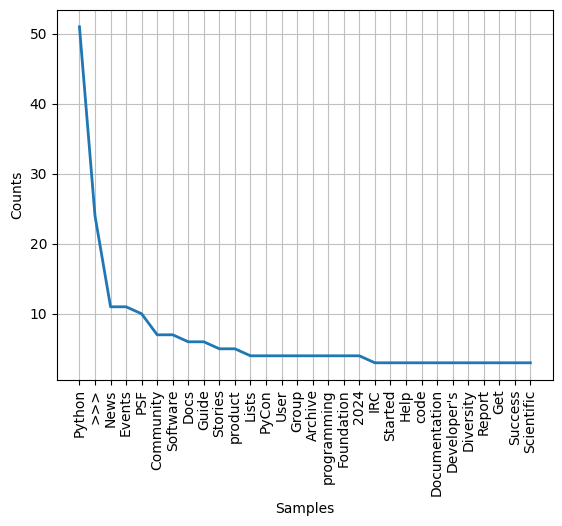

<Axes: xlabel='Samples', ylabel='Counts'>

In [21]:
response=urllib.request.urlopen('http://python.org/') # 웹에 정보를 요청한 후, 돌려받은 응답을 저장하여 ‘응답 객체(HTTPResponse)’를 반환
html=response.read()
clean=BeautifulSoup(html,'html.parser').get_text() # html 코드 정제 진행

tokens=[]
for tok in clean.split():
  tokens.append(tok) # tokens 리스트에 토큰들을 추가

stop=set(stopwords.words('english')) # 불용어 선언

clean_tokens=[]
for tok in tokens:
  if len(tok.lower())>1 and (tok.lower() not in stop): # 길이가 1 초과이며 stop word가 아닌 것만 추출해
    clean_tokens.append(tok) # clean_tokens 리스트에 추가

Freq_dist_nltk=nltk.FreqDist(clean_tokens) # FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스
Freq_dist_nltk.plot(30, cumulative=False) # 상위 30개를 시각화. 누적 갯수 표시는 False